# Estudos Regressão

In [1]:
## importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## importando o dataset

df = pd.read_excel('dados_cerveja_nota.xlsx')

df

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


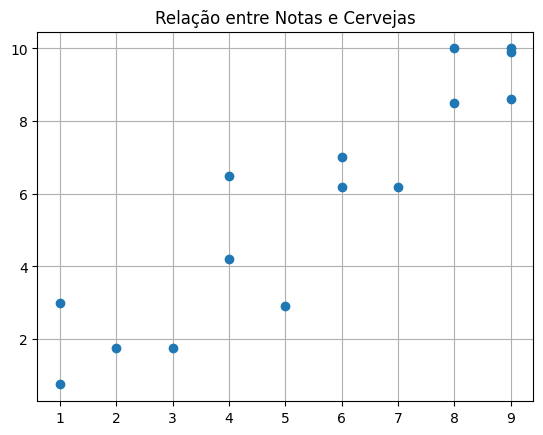

In [3]:
## visualizando os dados

plt.plot(df['cerveja'], df['nota'], 'o')
plt.grid(True)
plt.title('Relação entre Notas e Cervejas')
plt.show()

## Ajuste De Um Modelo De Regressão

In [4]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(df[['cerveja']], df['nota'])

LinearRegression()

In [7]:
## checando os coeficientes - A e B
a, b = reg.intercept_, reg.coef_[0]
print(f'a = {a}, b = {b}')

a = 0.15161290322580534, b = 1.0362903225806452


## Inserindo A Reta De Melhores - Gráfico

In [11]:
X = df[['cerveja']].drop_duplicates()
y_estimado = reg.predict(X)
y_estimado

array([1.18790323, 2.22419355, 3.26048387, 4.29677419, 5.33306452,
       6.36935484, 7.40564516, 8.44193548, 9.47822581])

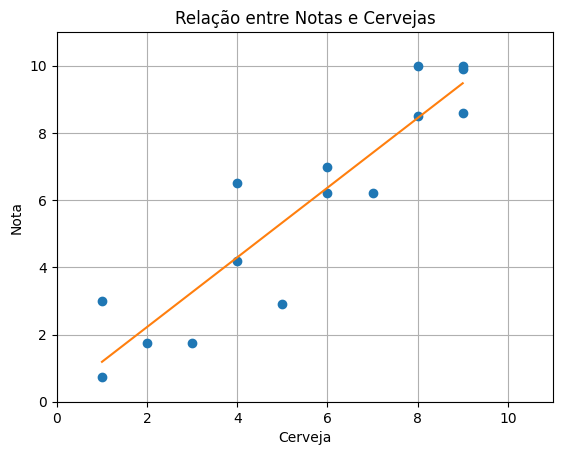

In [12]:
## visualizando os dados

plt.plot(df['cerveja'], df['nota'], 'o')
plt.plot(X, y_estimado, '-') ## inserindo a reta
plt.grid(True)
plt.title('Relação entre Notas e Cervejas')
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.xlabel('Cerveja')
plt.ylabel('Nota')
plt.show()

## Testando Uma Árvore De Decisão

In [14]:
from sklearn import tree
arvore = tree.DecisionTreeRegressor(max_depth = 2)
arvore.fit(df[['cerveja']], df['nota'])

DecisionTreeRegressor(max_depth=2)

In [15]:
y_estimado_arvore = arvore.predict(X)
y_estimado_arvore

array([1.8125    , 1.8125    , 1.8125    , 4.53333333, 4.53333333,
       6.46666667, 6.46666667, 9.4       , 9.4       ])

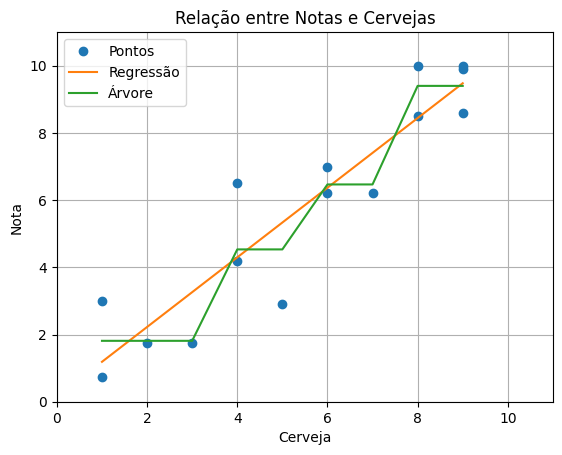

In [17]:
## visualizando os dados de regressão e árvore

plt.plot(df['cerveja'], df['nota'], 'o')
plt.plot(X, y_estimado, '-') ## inserindo a reta da regressão
plt.plot(X, y_estimado_arvore, '-') ## inserindo a reta da árvore
plt.grid(True)
plt.title('Relação entre Notas e Cervejas')
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.xlabel('Cerveja')
plt.ylabel('Nota')
plt.legend(['Pontos', 'Regressão', 'Árvore'])
plt.show()

## Explorando O Dataset Cerveja e Notas Novamente

In [18]:
## baixando novamente o dataset

df = pd.read_excel('dados_cerveja_nota.xlsx')

df

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


In [19]:
## criando nova coluna APROVADO

df['aprovado'] = df['nota'] >=5

df

,id,cerveja,nota,aprovado
0,1,1,0.75,False
1,2,1,3.00,False
2,3,2,1.75,False
3,4,3,1.75,False
4,5,4,4.20,False
5,6,4,6.50,True
6,7,5,2.90,False
7,8,6,6.20,True
8,9,6,7.00,True
9,10,7,6.20,True


### Logistic Regression

from sklearn import linear_model

reg = linear_model.LogisticRegression(penalty=None,
                                     fit_intercept=True)

In [24]:
features = ['cerveja']
target = 'aprovado'

## aqui o modelo aprende
reg.fit(df[features], df[target])

LogisticRegression(penalty=None)

Qual o erro o modelo está cometendo? Ele aprendeu?

#### Checando Se O Modelo Aprendeu

In [25]:
## aqui o modelo prevê
reg_predict = reg.predict(df[features])
reg_predict

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

## Verificando Métricas

In [26]:
from sklearn import metrics

In [27]:
reg_acc = metrics.accuracy_score(df[target], reg_predict)
reg_acc

0.8666666666666667

In [40]:
reg_precision = metrics.precision_score(df[target], reg_predict)
print('Precisão Reg Log.:', reg_precision)

Precisão Reg Log.: 0.8888888888888888


In [41]:
reg_recall = metrics.recall_score(df[target], reg_predict)
print('Recall Reg Log.:', reg_recall)

Recall Reg Log.: 0.8888888888888888


In [28]:
reg_conf = metrics.confusion_matrix(df[target], reg_predict)
reg_conf = pd.DataFrame(reg_conf,
                       index=['False', 'True'],
                       columns=['False', 'True'])

reg_conf

,False,True
False,5,1
True,1,8


#### Árvore De Decisão

In [31]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(max_depth=2)

## aqui o modelo aprende
tree.fit(df[features], df[target])

## aqui o modelo prevê
tree_predict = tree.predict(df[features])
tree_predict

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [32]:
tree_acc = metrics.accuracy_score(df[target], tree_predict)
tree_acc

0.9333333333333333

In [38]:
tree_precision = metrics.precision_score(df[target], tree_predict)
print('Precisão Tree Log.:', tree_precision)

Precisão Tree Log.: 1.0


In [39]:
tree_recall = metrics.recall_score(df[target], tree_predict)
print('Recall Tree Log.:', tree_recall)

Recall Tree Log.: 0.8888888888888888


In [33]:
tree_conf = metrics.confusion_matrix(df[target], tree_predict)
tree_conf = pd.DataFrame(tree_conf,
                       index=['False', 'True'],
                       columns=['False', 'True'])

tree_conf

,False,True
False,6,0
True,1,8


#### Naive Bayes

In [34]:
from sklearn import naive_bayes

nb = naive_bayes.GaussianNB()

## aqui o modelo aprende
nb.fit(df[features], df[target])

## aqui o modelo prevê
nb_predict = nb.predict(df[features])

nb_acc = metrics.accuracy_score(df[target], nb_predict)
nb_acc

0.8666666666666667

In [35]:
nb_conf = metrics.confusion_matrix(df[target], nb_predict)
nb_conf = pd.DataFrame(nb_conf,
                       index=['False', 'True'],
                       columns=['False', 'True'])

nb_conf

,False,True
False,5,1
True,1,8


In [42]:
nb_precision = metrics.precision_score(df[target], nb_predict)
print('Precisão NB Log.:', nb_precision)

Precisão NB Log.: 0.8888888888888888


In [43]:
nb_recall = metrics.recall_score(df[target], nb_predict)
print('Recall NB Log.:', nb_recall)

Recall NB Log.: 0.8888888888888888


- Se eu quiser pegar mais fraudes devo aumentar o Recall

As 3 métricas mostradas são feitas em cima do PREDICT

#### Testando A Curva ROC - Calculando Na Mão

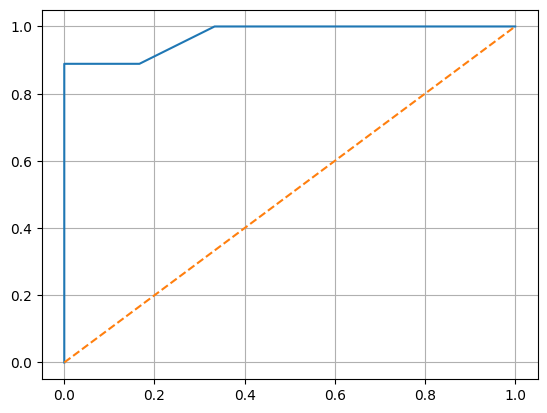

In [48]:
nb_proba = nb.predict_proba(df[features])[:,1]

roc_curve = metrics.roc_curve(df[target], nb_proba)

plt.plot(roc_curve[0], roc_curve[1])
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()